## Decision Tree

Decision Tree is a supervised learning algorithm that can be used for both classification and regresssion.
There are two types of Decision tree based on the target variable:
1. **Categorical Variable Decision Tree** - When target variable is categorical type
2. **Continuous Variable Decision Tree** - When target variable is continuous type

For example if we need to find out a custumer will purchase a house or not than we have a categorical target variable (Yes or No) and if we need to find out how much a customer can pay for a specific house than we have a continuous target variable ( Price of the house).


### Assumption of Decision Tree:
1. Feature values are preffered to be categorical if not discretization of continuous variables is required.
2. Training data will be wholly considered as root in the beginning
3. Records are distributed recurssively on the basis of attribute value

The tree has three type of nodes:
1. **Root Node** - No incoming edge and zero or more outgoing edge
2. **Internal Node** - Exactly one incoming edge and two or more outgoing edge
3. **Leaf or Termianl Node** - Exactly one incoming edge and no outgoing edge

Before going ahead lets look into some terminologies:
1. **Splitting** - Dividing a node into one or more sub-nodes
2. **Pruning** - Removing nodes to reduce the size of dcision tree
3. **Branch / SubTree** - Subsection of decision tree
4. **Parent and Child Node** - A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

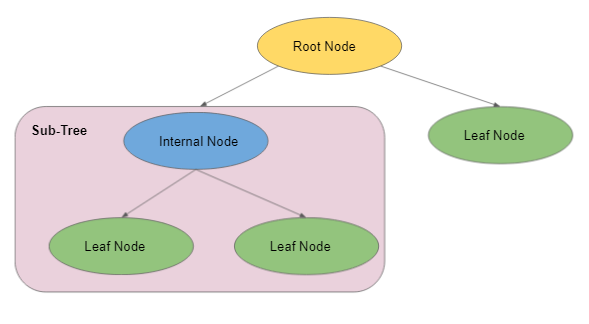

The steps that any decesion tree algorthim follows are:
1. Find the best attribute
2. Make that attribute as Root Node and break the dataset into smaller subset
3. Repeat this process for each child until one of the conditon will satisfy:
    1. There are no reamaining attributes
    2. There are no more instances
    3. All the tuples belong to the same tuple value
    
    
### Algorithms of Decision Tree:

The algorithm selction depends on the type of target variable
1. **ID3**
2. **C4.5**
3. **CART**
4. **CHAID**
5. **MARS**

 

Now the question arrises **how to find the best attribute??**

For this we need to `understand the math behind it`.

## Node splitting

1. Continuous Target Variable
    1. Reduction in Variance
2. Categorical Target Variable
    1. Gini Impurity
    2. Information Gain
    3. Chi-Square



### 1. Entropy

Entropy measures randomness or impurity/purity of the dataset. To understand this lets assume we have a basket fulled with chocolates. Lets say we have 30 chocolates in the basket nothing else. So the set of chocolates within the basket can be called totally pure because there are only chocolates in the basket or we can say set of chocolates has an entropy or impurity zero. 

Assume, we replaced 15 chocolates with toffee. Now we have chocolates and toffee in the basket.

${Entropy} = - \sum \limits _{i =1} ^{n} P (x=k)*Log_{2}(P (x=k))$ 

{where n denotes the maximum number of unique target variables}

To find Entropy for our example :-

**Case 1 - When we have 30 chocolates in the basket**

P(x = chocolate) = 1

Entropy = - (1 * $Log_{2}$(1)) = 0

**Case 2 - When we have 15 chocolates and 15 toffees in the basket**

P(x = chocolate) = 1/2

P(x = toffee) = 1/2

Entropy = - ((1/2) * $Log_{2}$(1/2) + (1/2) * $Log_{2}$(1/2)) = -( 0.5*(-1)+0.5*(-1)) = 1

`The lesser the Entropy the better it is.`

### 2. Information Gain

Information Gain measures the reduction in Entropy. It gives us the attribute that need to be decesion node ( root node or internal node).

${Information Gain} = {Entropy(total collection)} - {Weighted Average*Entropy(each attribute)}$

We will choose that attribute whose Information Gain will be maximum. This solves our question, how to find the best attribute.

Lets create a sample dataset to apply Decision Trees algorithm. We are creating a dummy Weather data having target variable as Play.

`Select the split with the highest value of Information Gain`

### 3. Gini Impurity

Gini impurity measures the impurity of the nodes and calculated as 

$ Gini Impurity = 1 - Gini $

Where Gini is the sum of square probability of success of each class and measured as 

$ Gini = ( p1^2 +p2^2 +p3^2+ . . . +pn^2)$

`Select the split with the lowest value of Gini Impurity`

### 4. Reduction In Variance

Reduction in Variance method comes in use when the target variable is continuous. We take help of variance to split the node into child node in regression problems. 

$ Variance = \sum ((X-μ)^2) / N$

`Select the split with the lowest variance`

In [69]:
import pandas as pd

data= pd.DataFrame({"Outlook":["Sunny","Sunny","Overcast","Rainy","Rainy","Rainy","Overcast","Sunny","Sunny",
                               "Rainy","Sunny","Overcast","Overcast","Rainy"],
                    "Temp":["Hot","Hot","Hot","Mild","Cool","Cool","Cool","Mild","Cool","Mild","Mild","Mild",
                            "Hot","Mild"],
                    "Humidity":["High","High","High","High","Normal","Normal","Normal","High","Normal","Normal",
                                "Normal","High","Normal","High"],
                    "Windy":["False","True","False","False","False","True","True","False","False","False","True",
                             "True","False","True"],
                    "Play":["No","No","Yes","Yes","Yes","No","Yes","No","Yes","Yes","Yes","Yes","Yes","No"]})

data.head()

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


**Step 1 - Compute the Entropy for entire dataset**

We have 9 Yes and 5 No in our Target variable (i.e. "Play")

$Entropy(totalcollection)= -(P (Yes)*Log_{2}(P (Yes)+P (No)*Log_{2}(P (No))$
$Entropy(totalcollection)= -((9/14)*Log_{2}(9/14)+(5/14)*Log_{2}(5/14))$

$Entropy(totalcollection)= 0.94$

**Step 2 - Which node to be selected as root node**

For this we need o find out Entropy for each atributes. Lets start with "Outlook"

In [70]:
print("Sunny ->\n",data[data["Outlook"]=="Sunny"]["Play"].value_counts(),"\n")
print("Overcast ->\n",data[data["Outlook"]=="Overcast"]["Play"].value_counts(),"\n")
print("Rainy ->\n",data[data["Outlook"]=="Rainy"]["Play"].value_counts(),"\n")

Sunny ->
 No     3
Yes    2
Name: Play, dtype: int64 

Overcast ->
 Yes    4
Name: Play, dtype: int64 

Rainy ->
 Yes    3
No     2
Name: Play, dtype: int64 



In Outlook we have 3 No, 2 Yes for "Sunny", 4 Yes for "Overcast", 3 Yes, 2 No for "Rainy".

$Entropy(Outlook=Sunny)= -(P (Yes)*Log_{2}(P (Yes)+P (No)*Log_{2}(P (No))$
$Entropy(Outlook=Sunny)= -((2/5)*Log_{2}(2/5)+(3/5)*Log_{2}(3/5))$

$Entropy(Outlook=Sunny)= 0.9701$

$Entropy(Outlook=Overcast)= -(P (Yes)*Log_{2}(P (Yes)+P (No)*Log_{2}(P (No))$
$Entropy(Outlook=Overcast)= -((1)*Log_{2}(1)+(0)*Log_{2}(0))$

$Entropy(Outlook=Overcast)= 0$

$Entropy(Outlook=Rainy)= -(P (Yes)*Log_{2}(P (Yes)+P (No)*Log_{2}(P (No))$
$Entropy(Outlook=Rainy)= -((3/5)*Log_{2}(3/5)+(2/5)*Log_{2}(2/5))$

$Entropy(Outlook=Rainy)= 0.9701$

${Information Gain(Outlook)} = {Entropy(total collection)} - {Weighted Average*Entropy(each attribute)}$
${Information Gain(Outlook)}= 0.94-((5/14)*0.9701+(4/14)*0+(5/14)*0.9701)$

### `Information Gain(Outlook)=0.247`

Similarly we will find Information Gain for rest of the attributes and will choose that attribute who has `maximum Information Gain`.

## Model Development using Scikit Learn

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# import iris dataset
import sklearn
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
# Store feature columns in X
X= iris.data
# Store target vector in y
y= iris.target

In [71]:
# making dataframe
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=1)

In [59]:
# decision tree classifier
clf = DecisionTreeClassifier()
# fit our model
clf.fit(X_train, y_train)
# predict
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)
print("Accuracy on training :", metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy on testing :", metrics.accuracy_score(y_test,y_test_pred))

Accuracy on training : 1.0
Accuracy on testing : 0.9333333333333333


Clearly we can see our model has memorized all values of training data so it leads to Overfitting the training dataset.

In [67]:
# decision tree classifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
# fit our model
clf.fit(X_train, y_train)
# predict
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)
print("Accuracy on training :", metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy on testing :", metrics.accuracy_score(y_test,y_test_pred))

Accuracy on training : 0.9777777777777777
Accuracy on testing : 0.9714285714285714


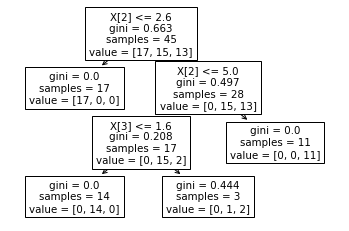

In [68]:
feature_columns=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
sklearn.tree.plot_tree(clf);

**Advantages**

1. Decision Tree is easy to understand, to ceate model and to explain to people.
2. There is no need to normalize as well as scale the data.
3. Decision tree can be used for both regression and classification problems
4. Outliers and Missing values don't effect much decision tree model

**Disadvantages**

1. Decision trees are prone to overfit the training data.
2. A small change in the data can give totally different tree structure.
3. Decision Tree are computationally expensive.
4. If continuous features are used the tree may become quite large and hence less interpretable

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()
rf=rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy is :", metrics.accuracy_score(y_test,y_pred))

## Xgboost

In [ ]:
# pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier()
xgb=xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy is :", metrics.accuracy_score(y_test,y_pred))

In [ ]:
data=pd.concat([data,pd.get_dummies(data["Outlook"]),pd.get_dummies(data["Temp"])],axis=1)

In [ ]:
data["Humidity"]=data["Humidity"].replace("High",1)
data["Humidity"]=data["Humidity"].replace("Normal",0)

data["Windy"]=data["Windy"].replace("False",0)
data["Windy"]=data["Windy"].replace("True",1)

data["Play"]=data["Play"].replace("No",0)
data["Play"]=data["Play"].replace("Yes",1)

del data["Outlook"]
del data["Temp"]

In [ ]:
data.columns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data[['Humidity', 'Windy', 'Overcast', 'Rainy', 'Sunny', 'Cool','Hot', 'Mild']], data["Play"], test_size=0.7,random_state=1)

In [ ]:
dtc= DecisionTreeClassifier()
dtc=dtc.fit(X_train,y_train)
y_pred= dtc.predict(X_test)

In [ ]:
dtc.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy is :", metrics.accuracy_score(y_test,y_pred))

In [ ]:
# pip install graphviz
# pip install pydotplus

In [ ]:
feature_columns=['Humidity', 'Windy', 'Overcast', 'Rainy', 'Sunny', 'Cool','Hot', 'Mild']

In [ ]:
sklearn.tree.plot_tree(dtc);